In [3]:
!pip install kagglehub

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tobiasbueck/multilingual-customer-support-tickets")

print("Path to dataset files:", path)

c:\Users\prajw\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.08M/2.08M [00:02<00:00, 963kB/s] 

Extracting files...
Path to dataset files: C:\Users\prajw\.cache\kagglehub\datasets\tobiasbueck\multilingual-customer-support-tickets\versions\8


In [8]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv(r'C:\Users\prajw\Documents\infosys_internship\dataset-tickets-multi-lang3-4k.csv')

# Display the first few rows of the dataframe
print(df.head())

                                             subject  \
0  Problema crítico del servidor requiere atenció...   
1     Anfrage zur Verfügbarkeit des Dell XPS 13 9310   
2  Erro na Autocompletação de Código do IntelliJ ...   
3            Urgent Assistance Required: AWS Service   
4                Problème d'affichage de MacBook Air   

                                                body  \
0  Es necesaria una investigación inmediata sobre...   
1  Sehr geehrter Kundenservice,\n\nich hoffe, die...   
2  Prezado Suporte ao Cliente <name>,\n\nEstou es...   
3  Dear IT Services Support Team, \n\nI am reachi...   
4  Cher équipe de support du magasin en ligne Tec...   

                                              answer      type  \
0  Estamos investigando urgentemente el problema ...  Incident   
1  Sehr geehrter <name>,\n\nvielen Dank, dass Sie...   Request   
2  Prezado <name>,\n\nObrigado por entrar em cont...  Incident   
3  Dear <name>,\n\nThank you for reaching out reg...   Request

In [9]:
print(df.shape)  
print(df.columns)  # Get the column names

(4000, 17)
Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8', 'tag_9'],
      dtype='object')


In [10]:
print(df.head())
print(df.dtypes)


                                             subject  \
0  Problema crítico del servidor requiere atenció...   
1     Anfrage zur Verfügbarkeit des Dell XPS 13 9310   
2  Erro na Autocompletação de Código do IntelliJ ...   
3            Urgent Assistance Required: AWS Service   
4                Problème d'affichage de MacBook Air   

                                                body  \
0  Es necesaria una investigación inmediata sobre...   
1  Sehr geehrter Kundenservice,\n\nich hoffe, die...   
2  Prezado Suporte ao Cliente <name>,\n\nEstou es...   
3  Dear IT Services Support Team, \n\nI am reachi...   
4  Cher équipe de support du magasin en ligne Tec...   

                                              answer      type  \
0  Estamos investigando urgentemente el problema ...  Incident   
1  Sehr geehrter <name>,\n\nvielen Dank, dass Sie...   Request   
2  Prezado <name>,\n\nObrigado por entrar em cont...  Incident   
3  Dear <name>,\n\nThank you for reaching out reg...   Request

In [13]:
print(df.isnull().sum())


subject           467
body                1
answer              0
type                0
queue               0
priority            0
language            0
business_type       0
tag_1               0
tag_2               0
tag_3               0
tag_4               1
tag_5             637
tag_6            1819
tag_7            2955
tag_8            3731
tag_9            4000
dtype: int64


In [14]:
print(df.describe())  # Get summary statistics for numerical columns

       tag_9
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN


In [16]:
print(df.columns)

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8', 'tag_9'],
      dtype='object')


In [21]:
# Display the column names
print("Columns in the dataset:")
print(df.columns)

# Display the first few rows of the DataFrame
print("First few rows of the dataset:")
print(df.head(10))

Columns in the dataset:
Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'tag_8', 'tag_9'],
      dtype='object')
First few rows of the dataset:
                                             subject  \
0  Problema crítico del servidor requiere atenció...   
1     Anfrage zur Verfügbarkeit des Dell XPS 13 9310   
2  Erro na Autocompletação de Código do IntelliJ ...   
3            Urgent Assistance Required: AWS Service   
4                Problème d'affichage de MacBook Air   
5     Urgent: Issue with Zoom Screen Sharing Feature   
6    Discrepancia de facturación en Google Workspace   
7  Service outage resolution requested for ongoin...   
8                                Surface Pro 7 Issue   
9   Problèmes de déploiement avec les ressources AWS   

                                                body  \
0  Es necesaria una investigación inmediata sobre...   
1  S

In [23]:
# Analyze the 'type' column to understand its composition
dataset = df  # Rename the dataframe for consistency in the code below

type_counts = dataset['type'].value_counts()

# Display the counts of each issue class
type_counts

Incident    1608
Request     1097
Problem      853
Change       442
Name: type, dtype: int64

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import numpy as np

# Data Preparation
# Combining 'subject' and 'body' columns for clustering
df['text_combined'] = df['subject'].fillna('') + " " + df['body'].fillna('')

# Pipeline for Clustering
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),  # Text to numerical features
    ('kmeans', KMeans(n_clusters=5, random_state=42))  # KMeans clustering with 5 clusters
])

# Fit the pipeline to the df
pipeline.fit(df['text_combined'])

# Get cluster assignments for each ticket
df['cluster'] = pipeline.named_steps['kmeans'].labels_

# Summarize the number of tickets per cluster
cluster_summary = df['cluster'].value_counts()

cluster_summary


c:\Users\prajw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2    1434
1     827
3     803
4     471
0     465
Name: cluster, dtype: int64

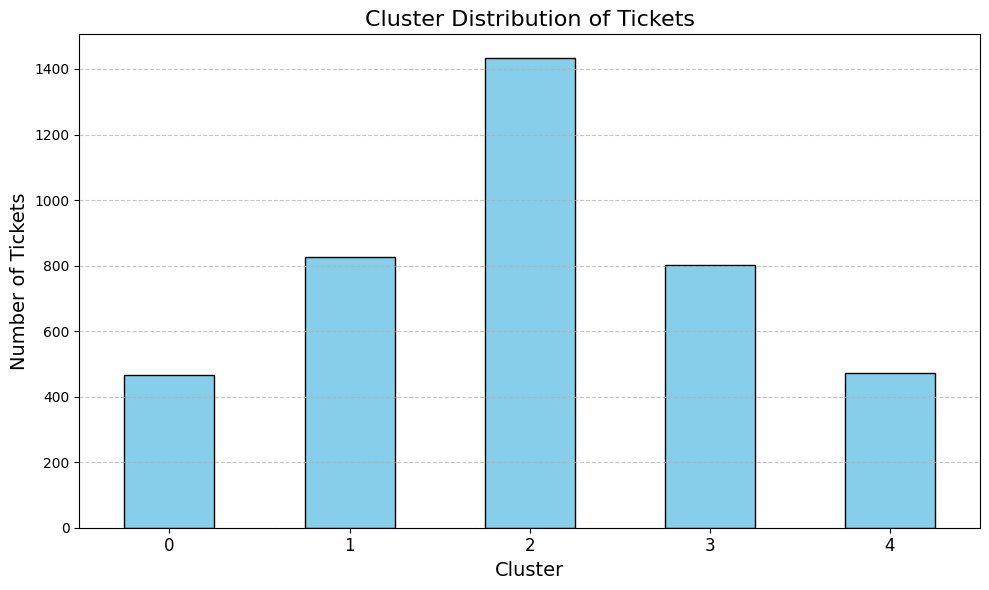

In [25]:
import matplotlib.pyplot as plt

# Visualize the cluster distribution using a bar chart
plt.figure(figsize=(10, 6))
cluster_summary.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Distribution of Tickets', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Number of Tickets', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
# Filter the DataFrame for entries in cluster 2
cluster_2_entries = df[df['cluster'] == 2]

# Display the first few entries in cluster 2
print("Entries in Cluster 2:")
print(cluster_2_entries[['subject', 'body', 'text_combined']].head())  # Adjust columns as needed

Entries in Cluster 2:
                                              subject  \
3             Urgent Assistance Required: AWS Service   
5      Urgent: Issue with Zoom Screen Sharing Feature   
7   Service outage resolution requested for ongoin...   
8                                 Surface Pro 7 Issue   
10  Request for software development consultation ...   

                                                 body  \
3   Dear IT Services Support Team, \n\nI am reachi...   
5   Dear Customer Support,\n\nI am experiencing a ...   
7   Dear IT Services Customer Support,\n\nI am wri...   
8   Dear Tech Online Store Support Team,\n\nI hope...   
10  Dear Customer Support,\n\nI hope this message ...   

                                        text_combined  
3   Urgent Assistance Required: AWS Service Dear I...  
5   Urgent: Issue with Zoom Screen Sharing Feature...  
7   Service outage resolution requested for ongoin...  
8   Surface Pro 7 Issue Dear Tech Online Store Sup...  
10  Request 

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# Dataset with email column
df = pd.DataFrame({
    'email': ['john.doe@example.com', 'jane.smith@example.com', 'alice.jones@example.com', 'bob.brown@example.com', 'charlie.white@example.com'],
    'subject': ['Login issue', 'Payment failed', 'Unable to reset password', 'Order not delivered', 'Refund delayed'],
    'body': [
        'Cannot log in to my account', 
        'Payment did not go through', 
        'Forgot password and cannot reset', 
        'My package is not delivered yet', 
        'Waiting for refund for 2 weeks'
    ]
})

# Combine 'subject' and 'body' for clustering
df['text_combined'] = df['subject'].fillna('') + " " + df['body'].fillna('')

# Pipeline for Clustering
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),  # Text to numerical features
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # KMeans clustering with 3 clusters
])

# Fit the pipeline
pipeline.fit(df['text_combined'])

# Assign clusters to each ticket
df['cluster'] = pipeline.named_steps['kmeans'].labels_

# Summarize the number of tickets per cluster
cluster_summary = df['cluster'].value_counts()

# Template for responses
def generate_response(username, issue_type):
    return f"Hello {username}, we have identified your issue as '{issue_type}'. Our team is actively working on resolving this. Thank you for your patience!"

# Generate a response for each cluster
issue_types = ["Login issue", "Payment issue", "Order issue"]  # Replace with descriptive names for clusters

for index, row in df.iterrows():
    email = row['email']
    username = email.split('@')[0]  # Extract username from email
    cluster_id = row['cluster']
    issue_type = issue_types[cluster_id]
    print(generate_response(username, issue_type))

Hello john.doe, we have identified your issue as 'Login issue'. Our team is actively working on resolving this. Thank you for your patience!
Hello jane.smith, we have identified your issue as 'Payment issue'. Our team is actively working on resolving this. Thank you for your patience!
Hello alice.jones, we have identified your issue as 'Payment issue'. Our team is actively working on resolving this. Thank you for your patience!
Hello bob.brown, we have identified your issue as 'Payment issue'. Our team is actively working on resolving this. Thank you for your patience!
Hello charlie.white, we have identified your issue as 'Order issue'. Our team is actively working on resolving this. Thank you for your patience!


c:\Users\prajw\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
